In [3]:


from scipy.spatial.distance import squareform, pdist

from tqdm import tqdm

from rdkit.Chem import AllChem
import pandas as pd 
from rdkit import Chem
from rdkit.Chem import AllChem
from typing import List
import numpy as np

In [4]:
df = pd.read_csv('/home/matt/Proj/MatSciCuration_TBV/Data/Dyes/DyeDescriptors.csv')

/tmp/ipykernel_4145927/1312042341.py:1: DtypeWarning: Columns (2,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/matt/Proj/MatSciCuration_TBV/Data/Dyes/DyeDescriptors.csv')


In [5]:
df[df['SMILES'].duplicated()]

,SMILES,Tag,Solvent,Absorption max (nm),Emission max (nm),Lifetime (ns),Quantum yield,log(e/mol-1 dm3 cm-1),abs FWHM (cm-1),emi FWHM (cm-1),...,fp_1014,fp_1015,fp_1016,fp_1017,fp_1018,fp_1019,fp_1020,fp_1021,fp_1022,fp_1023


In [7]:
Fingerprint_matrix = df.filter(regex='fp_')
dist = pd.DataFrame(squareform(pdist(Fingerprint_matrix.iloc[:, 1:])))


# we have a potential duplicate when there is a very low distance between points
#change matrix to numpy for faster runtime
Dist = dist.to_numpy()
flaglist = []
#iterate over top triangle of distance matrix 
q = len(Dist)


for i in tqdm(range(1,q-1)):
  for j in range(i+1,q):
    z = Dist[i][j]
    if z == 0.0:
      flaglist.append((i,j))
    else:
      continue
     

100%|██████████| 31850/31850 [01:23<00:00, 380.16it/s] 


In [9]:
len(flaglist)

494

In [14]:
t1 = df['SMILES'][flaglist[0][0]]

In [19]:
t1

'c1csc(-c2ccc(-c3ccc(-c4ccc(-c5cccs5)s4)s3)s2)c1'

In [17]:
t2 =df['SMILES'][flaglist[0][0]]

In [20]:
t2

'c1csc(-c2ccc(-c3ccc(-c4ccc(-c5cccs5)s4)s3)s2)c1'

In [12]:
flaglist[0][0]

34

In [13]:
flaglist[0][1]

37

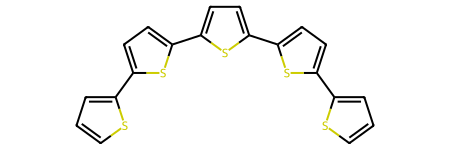

In [16]:
mol = Chem.MolFromSmiles(t1)
mol

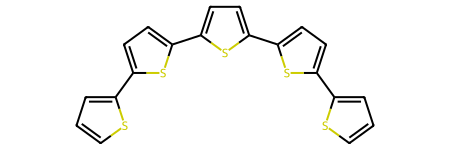

In [18]:
mol2 = Chem.MolFromSmiles(t2)
mol2

In [22]:
df.iloc[34]

SMILES                 c1csc(-c2ccc(-c3ccc(-c4ccc(-c5cccs5)s4)s3)s2)c1
Tag                                                             9426.0
Solvent                                                           CC#N
Absorption max (nm)                                              413.0
Emission max (nm)                                                479.0
                                            ...                       
fp_1019                                                            0.0
fp_1020                                                            0.0
fp_1021                                                            0.0
fp_1022                                                            0.0
fp_1023                                                            0.0
Name: 34, Length: 1054, dtype: object

In [23]:
df.iloc[37]

SMILES                 c1csc(-c2ccc(-c3cccs3)s2)c1
Tag                                         2769.0
Solvent                                      ClCCl
Absorption max (nm)                          355.0
Emission max (nm)                            432.0
                                  ...             
fp_1019                                        0.0
fp_1020                                        0.0
fp_1021                                        0.0
fp_1022                                        0.0
fp_1023                                        0.0
Name: 37, Length: 1054, dtype: object